In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_snorkel_40 = pd.read_csv('df_snorkel_40.csv')

In [3]:
df_gpt = pd.read_csv('df_gpt.csv')

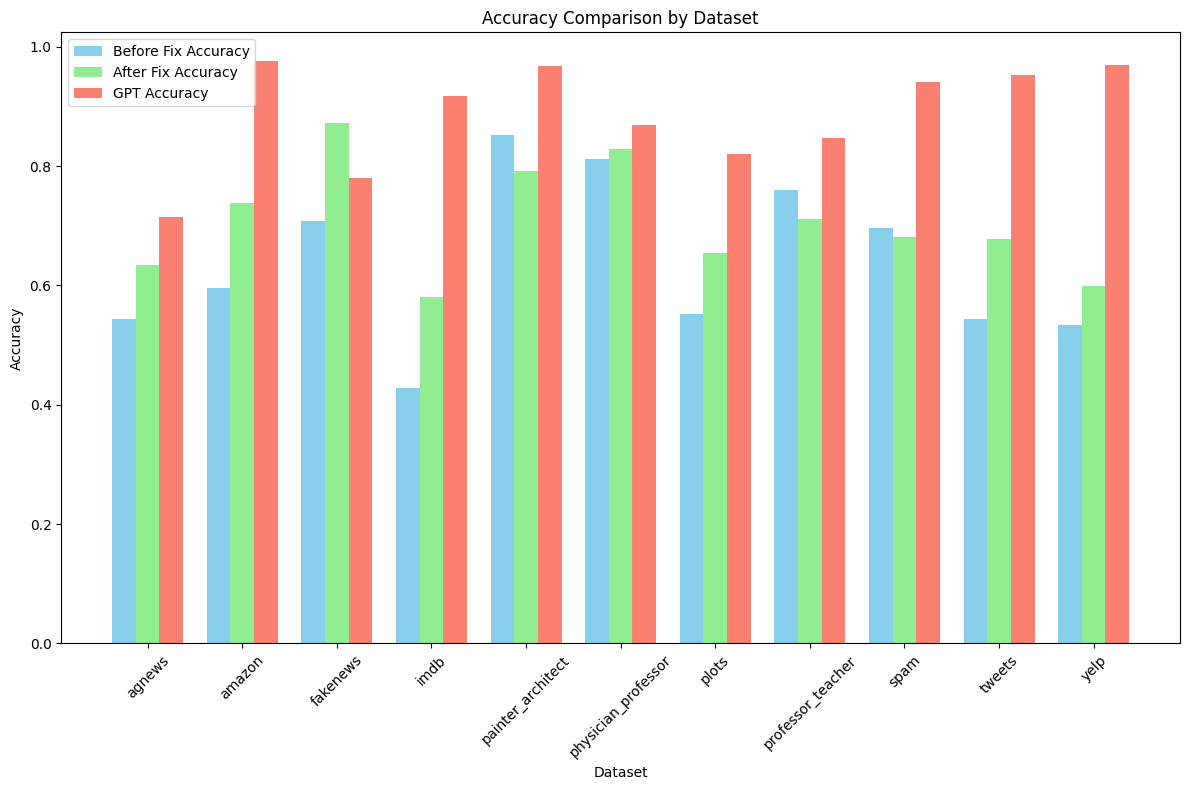

In [10]:
# Group by dataset and calculate averages
snorkel_grouped = df_snorkel_40.groupby('dataset_name')[['before_fix_global_accuracy', 'new_global_accuracy']].mean()
gpt_grouped = df_gpt.groupby('dataset')['accuracy'].mean()

# Merge the grouped dataframes to align datasets
comparison_df = snorkel_grouped.join(gpt_grouped, how='inner').reset_index()

# Rename columns for clarity
comparison_df.columns = ['Dataset', 'Before Fix Accuracy', 'After Fix Accuracy', 'GPT Accuracy']

# Plot grouped bar chart for accuracy
plt.figure(figsize=(12, 8))
x = range(len(comparison_df))

bar_width = 0.25

plt.bar(x, comparison_df['Before Fix Accuracy'], width=bar_width, color='skyblue', label='Before Fix Accuracy', align='center')
plt.bar([i + bar_width for i in x], comparison_df['After Fix Accuracy'], width=bar_width, color='lightgreen', label='After Fix Accuracy', align='center')
plt.bar([i + 2 * bar_width for i in x], comparison_df['GPT Accuracy'], width=bar_width, color='salmon', label='GPT Accuracy', align='center')

plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison by Dataset')
plt.xticks([i + bar_width for i in x], comparison_df['Dataset'], rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('accuracy_comparison_by_dataset.png')
# plt.close()
plt.show()

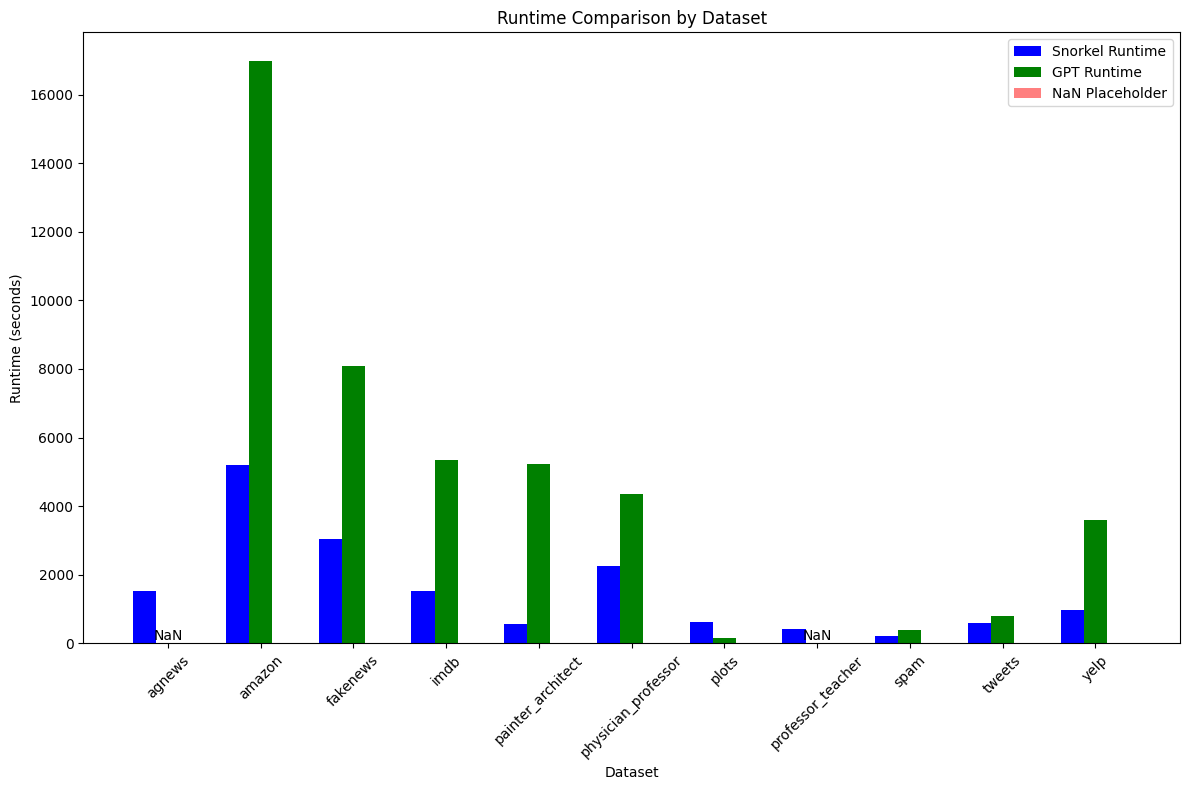

In [11]:
# Runtime by Dataset
# Create dataset-specific runtime comparison
df_snorkel_40['runtime_total'] = df_snorkel_40['runtimes'].apply(
    lambda x: sum(eval(x).values()) if isinstance(x, str) else 0
)
runtime_comparison = pd.DataFrame({
    'Dataset': df_snorkel_40['dataset_name'].unique(),
    'Snorkel Runtime': df_snorkel_40.groupby('dataset_name')['runtime_total'].sum(),
    'GPT Runtime': df_gpt.groupby('dataset')['runtime'].sum(),
    'NaN Placeholder': df_gpt[df_gpt['runtime'].isna()].groupby('dataset').size()
}).reset_index(drop=True)

# Replace missing values with NaN for clarity
runtime_comparison['GPT Runtime'] = runtime_comparison['GPT Runtime'].where(runtime_comparison['GPT Runtime'] > 0, np.nan)
runtime_comparison['NaN Placeholder'] = runtime_comparison['NaN Placeholder'].fillna(0) * 1  # Assign a unit placeholder for NaNs

# Plot grouped bar chart for runtime
plt.figure(figsize=(12, 8))
x = range(len(runtime_comparison))

bar_width = 0.25

plt.bar(x, runtime_comparison['Snorkel Runtime'], width=bar_width, color='blue', label='Snorkel Runtime')
plt.bar([i + bar_width for i in x], runtime_comparison['GPT Runtime'].fillna(0), width=bar_width, color='green', label='GPT Runtime')
plt.bar([i + 2 * bar_width for i in x], runtime_comparison['NaN Placeholder'], width=bar_width, color='red', alpha=0.5, label='NaN Placeholder')

# Highlight missing GPT Runtime values explicitly
for i, val in enumerate(runtime_comparison['GPT Runtime']):
    if np.isnan(val):
        plt.text(i + bar_width, 0.5, 'NaN', ha='center', va='bottom', color='black', fontsize=10)

# Add labels and title
plt.xlabel('Dataset')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime Comparison by Dataset')
plt.xticks([i + bar_width for i in x], runtime_comparison['Dataset'], rotation=45)
plt.legend()
plt.tight_layout()
plt.savefig('runtime_comparison_by_dataset.png')
plt.show()